### Introduction to Machine Learning in Finance and Insurance (Spring 2024)
# Project 1: Credit Analytics

### Team members: LastName1 FirstName1, LastName2 FirstName2, LastName3 FirstName3

In [2]:
### Import all the Python libraries you are going to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
### Fix random seed for reproducibility
np.random.seed(10)

# Exercise 1. Dataset features generation.

In [6]:
# Data set params
age_lower_bound = 18
age_upper_bound = 80.000001

income_lower_bound = 1
income_upper_bound = 15.000001

p_self_emplyed = .1

# train set power
m = int(2e4)
# test set power
n = int(1e4)

feature_headers = ['age', 'income', 'salaried']

# Age ,income and employment data
data = pd.DataFrame((np.random.uniform(age_lower_bound,age_upper_bound, m+n),
                     np.random.uniform(income_lower_bound,income_upper_bound, m+n),
                     np.random.binomial(1, p_self_emplyed, size = m+n))).transpose()
data.columns=feature_headers

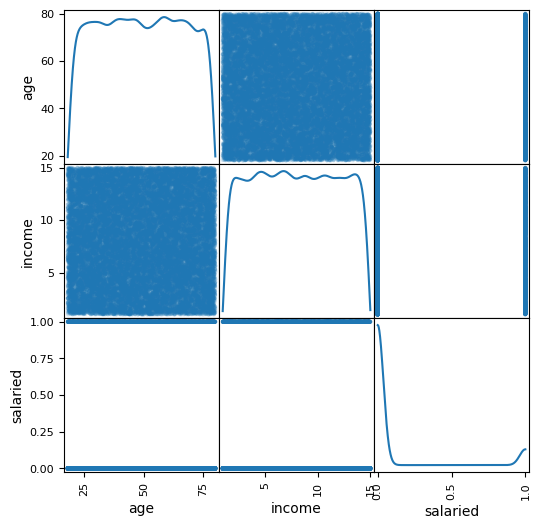

In [15]:
# Plot scatter matrix
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(6, 6),diagonal='kde')
plt.show()

1. We can observe that features have aproximately distributions as specified in the requirements
2. Features are independent of eachother

# Exercise 2. Dataset labels generation.

In [18]:
# Define logistic function
def logistic(z:float) -> float:
    return 1 / (1 + np.exp(-z))

# Define p1 parameters and function
p1_intecept = -13.3
p1_coeff = np.array([0.33,-3.5,3])

def p1(intecept: float, coeff: float, row:float) -> float:
    z = intecept + np.dot(coeff, row)
    return logistic(z)

# Define p2 parameters and function
p2_intecept = -5
p2_coeff = np.array([10,-1.1,1])
age_lower_bound = 25
age_upper_bound = 75


def indic(low_bound: float, up_bound: float):
    assert low_bound <= up_bound, 'lower boundry has to be less or equal to upper boundry'
    def arg(x):
        return 1 if x < low_bound else -1 if x > up_bound else 0
    return arg

def p2(intecept: float, coeff: float, row:float)-> float:
    p2_indicator = indic(age_lower_bound, age_upper_bound)
    
    row_trasformed = row.copy()
    row_trasformed.loc['age'] = p2_indicator(row_trasformed.loc['age'])
    z = intecept + np.dot(coeff, row_trasformed)
    return logistic(z)

In [19]:
df_prob = pd.DataFrame()
df_prob['p_1'] = data.apply(lambda row: p1(p1_intecept, p1_coeff, row), axis = 1)
df_prob['p_2'] = data.apply(lambda row: p2(p2_intecept, p2_coeff, row), axis = 1)

In [20]:
data.head()

,age,income,salaried
0,72.129101,10.717608,0.0
1,22.099327,6.433564,0.0
2,77.143540,13.106480,0.0
3,71.144311,14.836560,0.0
4,36.296374,14.202578,0.0


# Exercise 3. Model implementations.

### 3a) Logistic regression (LR)

In [1]:
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import log_loss # cross-entropy

# Implement and train a logistic regression model
# You can use LogisticRegression() from sklearn.linear_model (see the notebook "Project 1 - Sandbox.ipynb")
# For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Attention! Set the argument penalty=None to implement a logistic regression without regularization

In [ ]:
# Compute the cross-entropy loss on the training and test data.

### 3b) Neural network (NN)

In [2]:
import keras
# Implement and train a neural network model
# You can use Keras (see the notebook "Project 1 - Credit risk - Sandbox")
# For more information, see: https://keras.io/getting_started/

In [ ]:
# Compute the cross-entropy loss on the training and test data.

### 3c) ROC curves and AUC scores

In [ ]:
# Plot the ROC curves and compute the AUC scores
# You can use roc_auc_score and roc_curve from sklearn.metrics

# Exercise 4. Comparison of lending strategies

In [ ]:
# Implement a function to compute the Value at Risk (VaR) at level alpha on the vector x

def var(x, alpha):
    # Write your code here and return your VaR(alpha) estimate
    return None

In [ ]:
# Implement strategy (i), plot the P&L histogram and compute VaR(95%) of the losses

# Implement strategy (ii), plot the P&L histogram and compute VaR(95%) of the losses

# Implement strategy (iii), plot the P&L histogram and compute VaR(95%) of the losses